## AST/STAT 5731 Project 1
### Research Synopsis 1

**Group: 3**  
Hari Veeramallu  
Nicholas Kruegler  
Daniel Warshofsky  
Jonah Koleske  

### 1. Loading the data and Visualizing them

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from random import seed
import arviz as az
az.style.use('arviz-darkgrid')

In [5]:
df = pd.read_csv('./BinaryStarsNGC5053.tsv', delimiter='\t+')

/var/folders/0y/g8st3jw105s9wzrnrq3p1b1r0000gn/T/ipykernel_2595/459367608.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('./BinaryStarsNGC5053.tsv', delimiter='\t+')


In [7]:
df.sample(10)

,Star,Dist,VR,chi2,P(<chi2)
15,LY22,108.8,292.1,1.110,0.5739
54,S94,149.8,290.4,0.505,0.7768
34,SU,286.6,293.1,1.374,0.5031
20,S66,189.0,290.5,1.901,0.7539
7,LY116,114.4,289.7,0.508,0.9172
39,SX,275.8,291.2,10.110,0.0386
1,LY014,498.8,291.7,3.976,0.5528
59,LY08,248.5,291.4,0.588,0.4432
57,LY02,205.4,292.5,0.013,0.9084
17,S56,53.0,291.1,0.433,0.5104


**Data Description:**  
*Star* - Name of the star system.  
*Dist* - Radial distance of the star from the cluster  
*VR* - Weighted Mean Radial Velocity.  
*chi2* - Radial Velocity variability over the timespan of 3 years.  
*P(<chi2)* - Probability  

In [8]:
df.describe()

,Dist,VR,chi2,P(<chi2)
count,77.000000,77.000000,66.000000,66.000000
mean,210.640260,291.355844,63.162848,0.478300
std,117.873282,2.339562,484.350757,0.288685
min,15.200000,286.600000,0.013000,0.000000
25%,125.100000,290.000000,0.614000,0.265450
50%,205.400000,291.000000,1.259000,0.498950
75%,275.800000,292.500000,2.747750,0.711400
max,513.900000,299.200000,3938.000000,0.942000


Within these stars the binary stars are defined as the ones having *P(<chi2)* $\lt 0.01$.  

In [18]:
sin_obs = df[df['chi2'].isna()]
mul_obs = df[~df['chi2'].isna()]
bin_stars = mul_obs[mul_obs['P(<chi2)'] < 0.01]

In [19]:
print(f'Total number of star systems present: {len(df)}')
print(f'Number of star systems having only a single Radial Velocity measurement: {len(sin_obs)}')
print(f'Number of star systems having multiple Radial Velocity measurements: {len(mul_obs)}')
print(f'Number of binary stars among the ones with multiple RV measurements: {len(bin_stars)}')

Total number of star systems present: 77
Number of star systems having only a single Radial Velocity measurement: 11
Number of star systems having multiple Radial Velocity measurements: 66
Number of binary stars among the ones with multiple RV measurements: 6


From the description we can see that only 66 out of the 77 can be used for binary search since the remaining 11 only have a single radial velocity measurement observed.

### 2. Visualizing the data

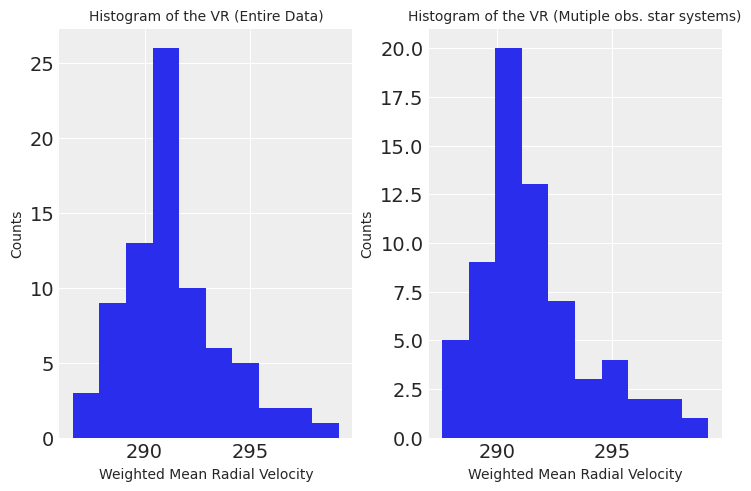

In [42]:
# histogram of Weighted Mean Radial Velocities (VR)
fig, ax = plt.subplots(1, 2)
ax[0].hist(df['VR'])
ax[0].set_xlabel('Weighted Mean Radial Velocity', size = 10)
ax[0].set_ylabel('Counts', size = 10)
ax[0].set_title('Histogram of the VR (Entire Data)', size = 10)
ax[1].hist(mul_obs['VR'])
ax[1].set_xlabel('Weighted Mean Radial Velocity', size = 10)
ax[1].set_ylabel('Counts', size = 10)
ax[1].set_title('Histogram of the VR (Mutiple obs. star systems)', size = 10)

plt.show()

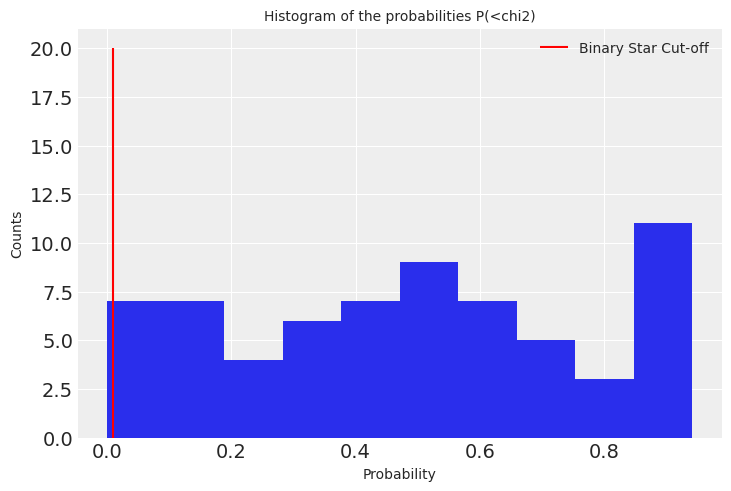

In [50]:
plt.hist(mul_obs['P(<chi2)'])
plt.vlines(0.01, 0, 20, label = "Binary Star Cut-off", color='r')
plt.xlabel('Probability', size=10)
plt.ylabel('Counts', size=10)
plt.title('Histogram of the probabilities P(<chi2)', size=10)
plt.legend(prop={'size': 10})
plt.show()

### 3. Model

1. $\theta$, the probability that the star system is binary.  
2. $\theta \in [0, 1]$  
3. $ x = 6, n = 66 $  
4. $ \mathcal{X} \in \{0, 1\}^{n} $  
5. $ X | \theta  \in Binomial(n, \theta) $  
6. Given $ a > 0, b > 0 $, then $ \theta \sim Beta(a, b) $ (since beta is the conjugate prior of binomial). 

Posterior is $\theta|x \sim Beta(a+x, n+b-x)$  

$E[X] = \frac{a}{a+b}$  

$Var[X] = \frac{ab}{(a+b)^2 (a+b+1)}$  

Assuming that the probability of a star system is binary is uniform, a = 1, b = 1

That would make the posterior $ => $ $ \theta | x \sim Beta(7, 61) $  
and $E[X] = \frac{1}{2} , Var[X] = \frac{1}{12} $

In [52]:
a = 1
b = 1